In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import scipy.stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from numpy import cov

In [33]:
chess = pd.read_csv (r'chess_games.csv')

In [87]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            20058 non-null  int64 
 1   rated              20058 non-null  int64 
 2   turns              20058 non-null  int64 
 3   victory_status     20058 non-null  object
 4   winner             20058 non-null  object
 5   time_increment     20058 non-null  object
 6   white_id           20058 non-null  object
 7   white_rating       20058 non-null  int64 
 8   black_id           20058 non-null  object
 9   black_rating       20058 non-null  int64 
 10  moves              20058 non-null  object
 11  opening_code       20058 non-null  object
 12  opening_moves      20058 non-null  int64 
 13  opening_fullname   20058 non-null  object
 14  opening_shortname  20058 non-null  object
 15  opening_response   1207 non-null   object
 16  opening_variation  14398 non-null  objec

## Variables

The seven variables I will be using from this dataset are:

1. rated
2. victory_status
3. winner
4. white_rating
5. black_rating
6. opening_shortname
7. turns


### rated

This variable provides information on whether the chess player in the game is rated or not. A rated game is a game that chess.com, from which the data came, is considered an official game. An official game is used to determine the player's chess rating based on the outcome of the player's game. 

#### Histogram and Charts for Rated Variable

In [56]:
chess.rated = chess.rated.replace({True:1, False: 0})

array([[<AxesSubplot:title={'center':'rated'}>]], dtype=object)

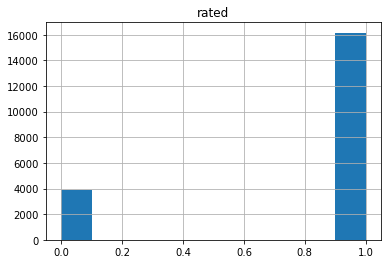

In [57]:
chess.hist(column = "rated")

Text(0, 0.5, 'Frequency')

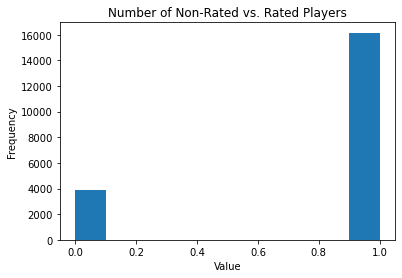

In [220]:
plt.hist(chess.rated)
plt.title("Number of Non-Rated vs. Rated Players")
plt.xlabel("Value")
plt.ylabel("Frequency")

#### Descriptive/Summary Statistics for Rated Variable

In [71]:
rated = chess.rated

In [76]:
rated.describe()

count    20058.000000
mean         0.805414
std          0.395891
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: rated, dtype: float64

In [75]:
rated.mode

<bound method Series.mode of 0        0
1        1
2        1
3        1
4        1
        ..
20053    1
20054    1
20055    1
20056    1
20057    1
Name: rated, Length: 20058, dtype: int64>

In [99]:
rated.var()

0.15672992008665634

In [100]:
rated.tail()

20053    1
20054    1
20055    1
20056    1
20057    1
Name: rated, dtype: int64

#### PMF for Rated

In [153]:
pmfRated = rated.value_counts().sort_index()/lens(rated)

NameError: name 'lens' is not defined

### victory_status

This variable breaks down each game played into the four sub-variables:
1. Draw
2. Mate
3. Resign
4. Out of Time

<AxesSubplot:>

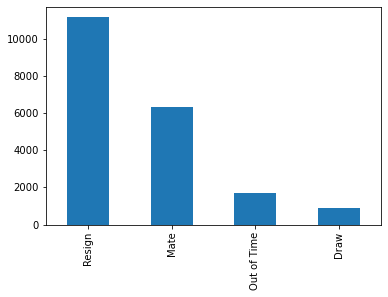

In [60]:
chess.victory_status.value_counts().plot.bar()

Text(0, 0.5, 'Frequency')

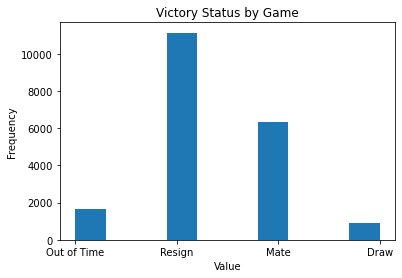

In [65]:
plt.hist(chess.victory_status)
plt.title("Victory Status by Game")
plt.xlabel("Value")
plt.ylabel("Frequency")

#### Descriptive/Summary Statistics for Victory Status Variable

In [80]:
VS = chess.victory_status

In [125]:
VS.value_counts()

Resign         11147
Mate            6325
Out of Time     1680
Draw             906
Name: victory_status, dtype: int64

In [88]:
VS.describe(include='object')

count      20058
unique         4
top       Resign
freq       11147
Name: victory_status, dtype: object

In [92]:
VS.mode()

0    Resign
dtype: object

In [102]:
VS.tail()

20053    Resign
20054      Mate
20055      Mate
20056    Resign
20057      Mate
Name: victory_status, dtype: object

### winner

This variable determines whether the player using black pieces or the play using white pieces won the game. In instances which resulted in draw, no winner is declared and draw is the output. In cases of resign, the player who did not withdraw is delcared the winner. In cases of out of time, the player currently in most advantage is delcared the winner.

<AxesSubplot:ylabel='Frequency'>

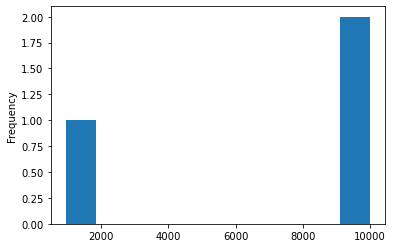

In [61]:
chess.winner.value_counts().plot.hist()

<AxesSubplot:>

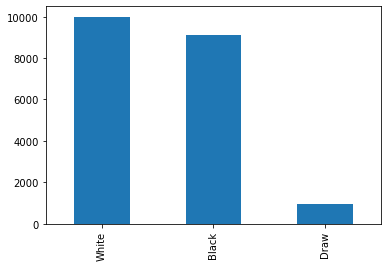

In [62]:
chess.winner.value_counts().plot.bar()

Text(0, 0.5, 'Frequency')

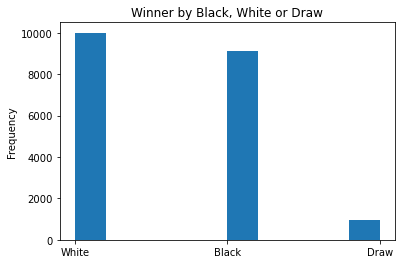

In [221]:
plt.hist(chess.winner)
plt.title("Winner by Black, White or Draw")
plt.ylabel("Frequency")

#### Descriptive/Summary Statistics for Winner Variable

In [91]:
winner = chess.winner

In [126]:
winner.value_counts()

White    10001
Black     9107
Draw       950
Name: winner, dtype: int64

In [94]:
winner.mode()

0    White
dtype: object

In [103]:
winner.tail()

20053    White
20054    Black
20055    White
20056    White
20057    Black
Name: winner, dtype: object

### white_rating

This variable provides the rating of the player using the white pieces. The rating scale for the chess system begins at "below 1200" to "2700+", with novices being under 1200 and World Championship Contenders having a rating of 2700+. 

array([[<AxesSubplot:title={'center':'white_rating'}>]], dtype=object)

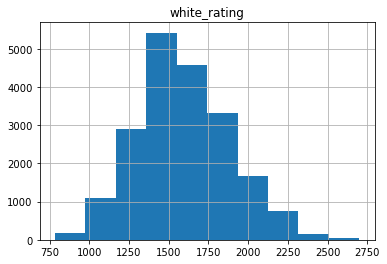

In [59]:
chess.hist(column = "white_rating")

Text(0, 0.5, 'Frequency')

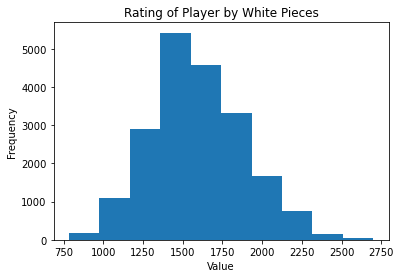

In [66]:
plt.hist(chess.white_rating)
plt.title("Rating of Player by White Pieces")
plt.xlabel("Value")
plt.ylabel("Frequency")

#### Descriptive/Summary Statistics for White Rating Variable

In [96]:
WR = chess.white_rating

In [128]:
WR.value_counts().nlargest(5)

1500    812
1480     51
1400     48
1536     46
1708     45
Name: white_rating, dtype: int64

In [129]:
WR.value_counts().nsmallest(5)

927     1
2205    1
2350    1
2237    1
2366    1
Name: white_rating, dtype: int64

In [97]:
WR.describe()

count    20058.000000
mean      1596.631868
std        291.253376
min        784.000000
25%       1398.000000
50%       1567.000000
75%       1793.000000
max       2700.000000
Name: white_rating, dtype: float64

In [98]:
WR.mode()

0    1500
dtype: int64

In [104]:
WR.var()

84828.52887820943

In [105]:
WR.tail()

20053    1691
20054    1233
20055    1219
20056    1360
20057    1235
Name: white_rating, dtype: int64

### black_rating

This variable provides the rating of the player using the black pieces. The rating scale for the chess system begins at "below 1200" to "2700+", with novices being under 1200 and World Championship Contenders having a rating of 2700+.

array([[<AxesSubplot:title={'center':'black_rating'}>]], dtype=object)

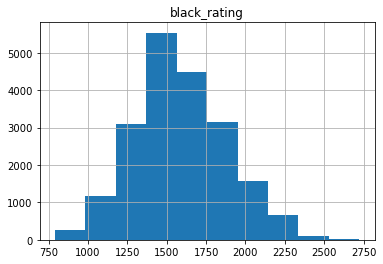

In [58]:
chess.hist(column = "black_rating")

Text(0, 0.5, 'Frequency')

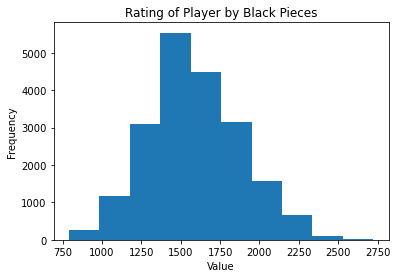

In [67]:
plt.hist(chess.black_rating)
plt.title("Rating of Player by Black Pieces")
plt.xlabel("Value")
plt.ylabel("Frequency")

#### Descriptive/Summary Statistics for Black Rating Variable

In [130]:
BR = chess.black_rating

In [131]:
BR.value_counts().nlargest(5)

1500    797
1400     69
1501     53
1810     49
1562     45
Name: black_rating, dtype: int64

In [132]:
BR.value_counts().nsmallest(5)

835     1
804     1
995     1
2299    1
881     1
Name: black_rating, dtype: int64

In [108]:
BR.describe()

count    20058.000000
mean      1588.831987
std        291.036126
min        789.000000
25%       1391.000000
50%       1562.000000
75%       1784.000000
max       2723.000000
Name: black_rating, dtype: float64

In [109]:
BR.mode()

0    1500
dtype: int64

In [111]:
BR.var()

84702.02661400114

In [112]:
BR.tail()

20053    1220
20054    1196
20055    1286
20056    1227
20057    1339
Name: black_rating, dtype: int64

### opening_shortname

This variable lists out the various openings used by the starting chess player for each game. 

Below, I tried to create a histogram plot of the variable "opening_fullname" to determine the count of each opening. I did not account for  the fact that chess has been around since the 8th Century and as such, there are many openings to the game. 

<AxesSubplot:>

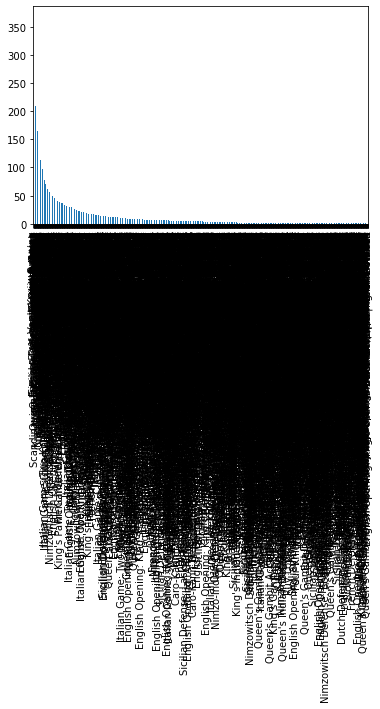

In [39]:
chess.opening_fullname.value_counts().plot.bar()

Because I chose the column named "opening_fullname", there were many variations by which to choose from and I was unable to create a clear histogram. I then chose to use the column, "opening_shortname".

<AxesSubplot:>

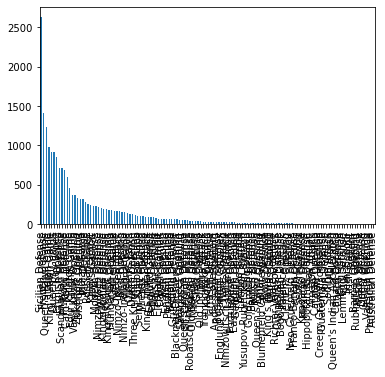

In [143]:
chess.opening_shortname.value_counts().plot.bar()

Text(0, 0.5, 'Frequency')

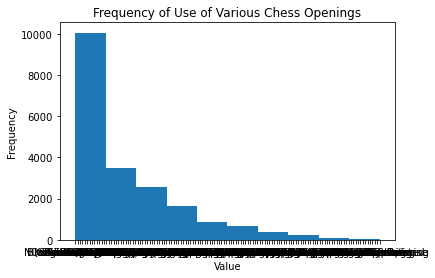

In [136]:
plt.hist(chess.opening_shortname)
plt.title("Frequency of Use of Various Chess Openings")
plt.xlabel("Value")
plt.ylabel("Frequency")

In [172]:
OSN_T5 = chess.opening_shortname.value_counts().nlargest(5)

Text(0, 0.5, 'Frequency')

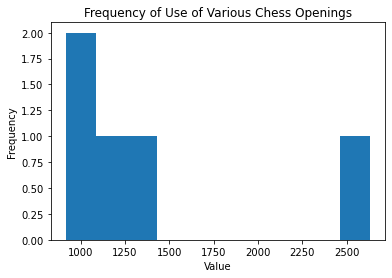

In [173]:
plt.hist(OSN_T5)
plt.title("Frequency of Use of Various Chess Openings")
plt.xlabel("Value")
plt.ylabel("Frequency")

<AxesSubplot:>

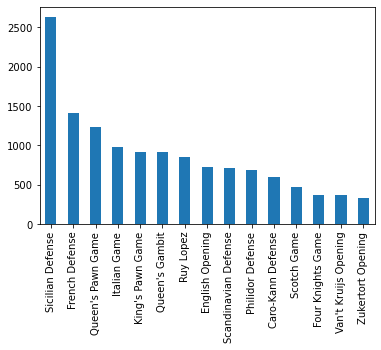

In [171]:
chess.opening_shortname.value_counts().nlargest(15).plot.bar()

#### Descriptive/Summary Statistics for Opening Shortname Variable

In [113]:
OSN = chess.opening_shortname

In [133]:
OSN.value_counts().nlargest(5)

Sicilian Defense     2632
French Defense       1412
Queen's Pawn Game    1233
Italian Game          981
King's Pawn Game      917
Name: opening_shortname, dtype: int64

In [134]:
OSN.value_counts().nsmallest(5)

Doery Defense          1
Global Opening         1
Valencia Opening       1
Pterodactyl Defense    1
Australian Defense     1
Name: opening_shortname, dtype: int64

In [114]:
OSN.describe()

count                20058
unique                 128
top       Sicilian Defense
freq                  2632
Name: opening_shortname, dtype: object

In [115]:
OSN.mode()

0    Sicilian Defense
dtype: object

In [117]:
OSN.tail()

20053        Dutch Defense
20054         Queen's Pawn
20055    Queen's Pawn Game
20056         Pirc Defense
20057    Queen's Pawn Game
Name: opening_shortname, dtype: object

### turns

This variable defines the number of turns taken for each game played in this data set. 

Text(0, 0.5, 'Frequency')

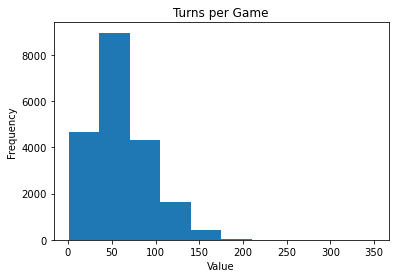

In [52]:
plt.hist(chess.turns)
plt.title("Turns per Game")
plt.xlabel("Value")
plt.ylabel("Frequency")

#### Descriptive/Summary Statistics for Turns Variable

In [119]:
turns = chess.turns

In [120]:
turns.describe()

count    20058.000000
mean        60.465999
std         33.570585
min          1.000000
25%         37.000000
50%         55.000000
75%         79.000000
max        349.000000
Name: turns, dtype: float64

In [121]:
turns.mode()

0    53
dtype: int64

In [122]:
turns.var()

1126.9841606944146

In [123]:
turns.tail()

20053     24
20054     82
20055     35
20056    109
20057     78
Name: turns, dtype: int64

## Creating a PMF

#### Opening Shortname PMF

Below, I take the variable "opening_shortname" and separate the top five most used openings for a chess game. Although each move is made by White everytime, I aim to determine how much the opening of a game affects it's ending. 

In [486]:
OSNtop_5 = chess["opening_shortname"].value_counts().nlargest(5)
print(OSNtop_5)

Sicilian Defense     2632
French Defense       1412
Queen's Pawn Game    1233
Italian Game          981
King's Pawn Game      917
Name: opening_shortname, dtype: int64


I was able to determine that the above 5 openings were the most used. I then took each of those openings and created an instance of each of those names in order to create a Probability Mass Function (PMF) for each of those openings. The code to create those instances can be seen below. 

In [487]:
SD = chess[chess.opening_shortname == "Sicilian Defense"]
FD = chess[chess.opening_shortname == "French Defense"]
QPG = chess[chess.opening_shortname == "Queen's Pawn Game"]
IG = chess[chess.opening_shortname == "Italian Game"]
KPG = chess[chess.opening_shortname == "King's Pawn Game"]

After, I am able to create the PMF for each opening. I do this with the naming convention of the first letter of each opening move followed by PMF to ensure I can keep easy track of the PMF's. I then printed out the first PMF in order to determine the order the code is tracking the outcomes of the games. The code is tracking in the order of Black Wins, Draws, and White Wins. This is the order that will be used when plotting the PMF.

In [488]:
SD_PMF = SD["winner"].value_counts().sort_index()/len(SD["winner"])
FD_PMF = FD["winner"].value_counts().sort_index()/len(FD["winner"])
QPG_PMF = QPG["winner"].value_counts().sort_index()/len(QPG["winner"])
IG_PMF = IG["winner"].value_counts().sort_index()/len(IG["winner"])
KPG_PMF = KPG["winner"].value_counts().sort_index()/len(KPG["winner"])

In [489]:
print(SD_PMF)

0    0.049392
1    0.457067
2    0.493541
Name: winner, dtype: float64


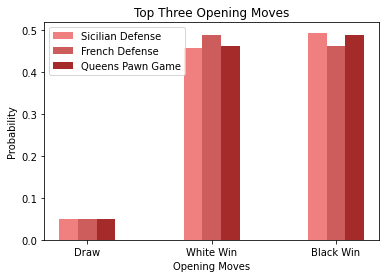

In [499]:
N = 3
ind = np.arange(N)
width=0.15

barSD = plt.bar(ind, SD_PMF, width, color = 'lightcoral')

barFD = plt.bar(ind+width, FD_PMF, width, color = 'indianred')

barQPG = plt.bar(ind+width*2, QPG_PMF, width, color = 'brown')

#barIG = plt.bar(ind, IG_PMF, width, color = 'firebrick')

#barKPG = plt.bar(ind+width*4, KPGG_PMF, width, color = 'maroon')


plt.xlabel("Opening Moves")
plt.ylabel("Probability")
plt.title("Top Three Opening Moves")

plt.xticks(ind+width, ['Draw', 'White Win', 'Black Win'])
plt.legend( (barSD, barFD, barQPG), ('Sicilian Defense', 'French Defense', 'Queens Pawn Game'))

I ultimately decided to utilize the top three most used opening moves to keep analyzation down for the time being. 

#### Victory Status PMF

In [286]:
SD1_PMF = SD["victory_status"].value_counts().sort_index()/len(SD["victory_status"])
FD1_PMF = FD["victory_status"].value_counts().sort_index()/len(FD["victory_status"])
QPG1_PMF = QPG["victory_status"].value_counts().sort_index()/len(QPG["victory_status"])
IG1_PMF = IG["victory_status"].value_counts().sort_index()/len(IG["victory_status"])
KPG1_PMF = KPG["victory_status"].value_counts().sort_index()/len(KPG["victory_status"])

In [287]:
print(SD1_PMF)

Draw           0.046353
Mate           0.273936
Out of Time    0.086626
Resign         0.593085
Name: victory_status, dtype: float64


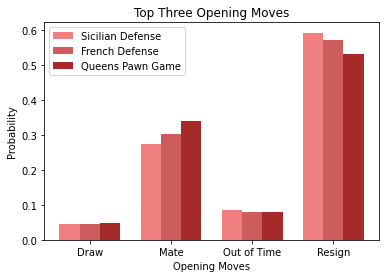

In [295]:
N = 4
ind = np.arange(N)
width=0.25

barSD1 = plt.bar(ind, SD1_PMF, width, color = 'lightcoral')
barFD1 = plt.bar(ind+width, FD1_PMF, width, color = 'indianred')
barQPG1 = plt.bar(ind+width*2, QPG1_PMF, width, color = 'brown')

plt.xlabel("Opening Moves")
plt.ylabel("Probability")
plt.title("Top Three Opening Moves by Match Status")

plt.xticks(ind+width, ['Draw', 'Mate', 'Out of Time', 'Resign'])
plt.legend( (barSD, barFD, barQPG), ('Sicilian Defense', 'French Defense', 'Queens Pawn Game'))

#### Moves PMF

In the code to follow, I follow the same logic as above, only I use the 'Moves' column within the dataset for the exploratory variable. I did this to determine how closely the opening move to a location on the chessboard would correlate to the opening moves names. 

In [230]:
#get first move in game

chess["first_move"] = chess["moves"].str.slice(0,2)

In [236]:
#determine top 3 most popular first moves

top_3 = chess["first_move"].value_counts().nlargest(3)
print(top_3)


e4    12598
d4     4522
Nf      725
Name: first_move, dtype: int64


In [237]:
#split
most_popular = chess[chess.first_move == "e4"]
second_popular = chess[chess.first_move == "d4"]
third_popular = chess[chess.first_move == "Nf"]


In [259]:
# calculate pmf for most, second, and third popular
mpPMF = most_popular["winner"].value_counts().sort_index() / len(most_popular["winner"])
print(mpPMF)
spPMF = second_popular["winner"].value_counts().sort_index() / len(second_popular["winner"])
tpPMF = third_popular["winner"].value_counts().sort_index() / len(third_popular["winner"])

Black    0.448563
Draw     0.045722
White    0.505715
Name: winner, dtype: float64


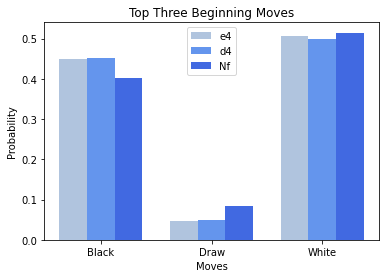

In [282]:
N = 3
ind = np.arange(N)
width=0.25

bar1 = plt.bar(ind, mpPMF, width, color = 'lightsteelblue')

bar2 = plt.bar(ind+width, spPMF, width, color = 'cornflowerblue')

bar3 = plt.bar(ind+width*2, tpPMF, width, color = 'royalblue')

plt.xlabel("Moves")
plt.ylabel("Probability")
plt.title("Top Three Beginning Moves")

plt.xticks(ind+width, ['Black', 'Draw', 'White'])
plt.legend( (bar1, bar2, bar3), ('e4', 'd4', 'Nf'))

## Creating a CDF

In [463]:
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

def plot_ecdf(a):
    x, y = ecdf(a)
    x = np.insert(x, 0, x[0])
    y = np.insert(y, 0, 0.)
    plt.plot(x, y, drawstyle='steps-post')
    plt.grid(True)
    plt.ylabel('CDF')
    plt.xlabel('Victory Status')
    plt.show()

In [319]:
OSNtop_3 = chess["opening_shortname"].value_counts().nlargest(3)
print(OSNtop_3)

Sicilian Defense     2632
French Defense       1412
Queen's Pawn Game    1233
Name: opening_shortname, dtype: int64


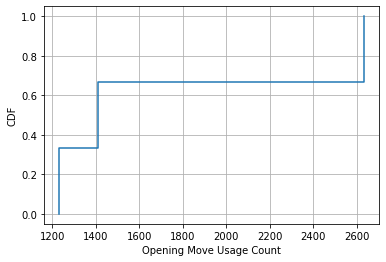

In [320]:
plot_ecdf(OSNtop_3)

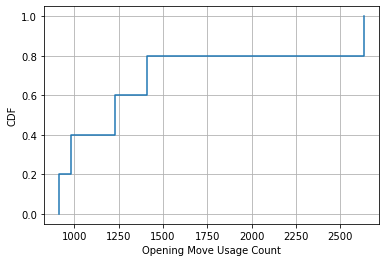

In [325]:
plot_ecdf(OSNtop_5)

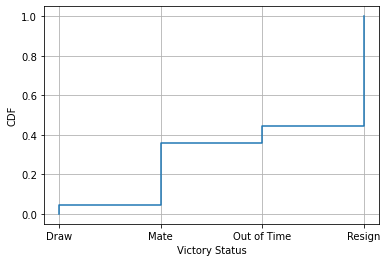

In [464]:
plot_ecdf(chess.victory_status)

## Creating an Analytical Distribution

In [326]:
chess.white_rating.describe()

count    20058.000000
mean      1596.631868
std        291.253376
min        784.000000
25%       1398.000000
50%       1567.000000
75%       1793.000000
max       2700.000000
Name: white_rating, dtype: float64

In [330]:
mu, sigma = 1596.63, 291.25

WR_ND = np.random.normal(mu, sigma, 1000)

abs(mu - np.mean(WR_ND))

abs(sigma - np.std(WR_ND, ddof=1))

5.016689215092299

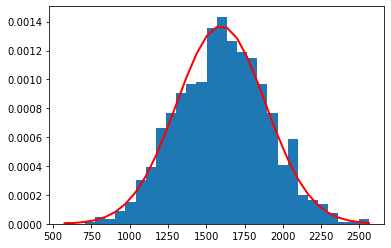

In [340]:
count, bins, ignored = plt.hist(WR_ND, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 *np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')

In [465]:
chess.black_rating.describe()

count    20058.000000
mean      1588.831987
std        291.036126
min        789.000000
25%       1391.000000
50%       1562.000000
75%       1784.000000
max       2723.000000
Name: black_rating, dtype: float64

In [466]:
mu, sigma = 1588.83, 291.04

BR_ND = np.random.normal(mu, sigma, 1000)

abs(mu - np.mean(BR_ND))

abs(sigma - np.std(BR_ND, ddof=1))

5.548837881036434

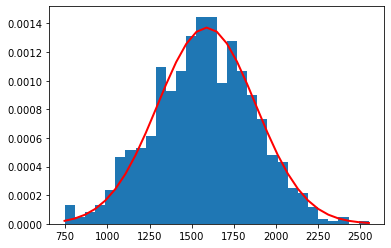

In [467]:
count, bins, ignored = plt.hist(BR_ND, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 *np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')

[1. 1. 1. ... 1. 1. 1.]


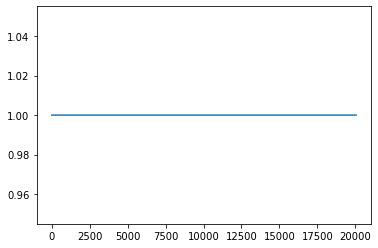

In [344]:
x = chess.white_rating
norm_cdf = scipy.stats.norm.cdf(x)
print(norm_cdf)

plt.plot(norm_cdf)

## Creating a Scatterplot

#### White Rating vs. Winner

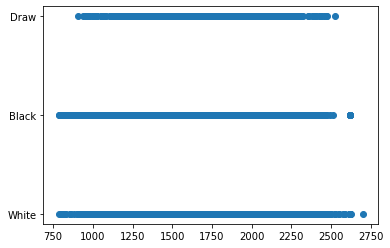

In [347]:
x = np.array(chess.white_rating)
y = np.array(chess.winner)

plt.scatter(x,y)

Spearman's Correlation

In [372]:
corr, _ = spearmanr(chess.white_rating, chess.winner)
print("Spearman's Correlation: %.3f" % corr)

Spearman's Correlation: 0.131


Covariance

#### Opening Shortname vs. Winner

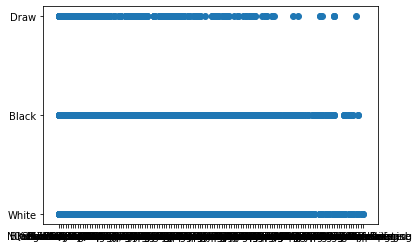

In [364]:
x = np.array(chess.opening_shortname)
y = np.array(chess.winner)

plt.scatter(x,y)

In [371]:
corr, _ = spearmanr(chess.opening_shortname, chess.winner)
print("Spearman's Correlation: %.3f" % corr)

Spearman's Correlation: -0.019


#### Black Rating vs. Winner

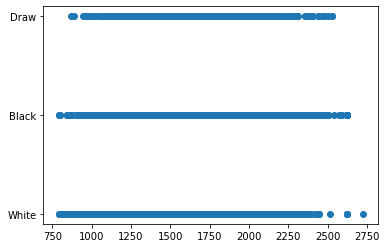

In [348]:
x = np.array(chess.black_rating)
y = np.array(chess.winner)

plt.scatter(x,y)

In [369]:
corr, _ = spearmanr(chess.black_rating, chess.winner)
print("Spearman's Correlation: %.3f" % corr)

Spearman's Correlation: -0.157


#### Black Rating vs. White Rating

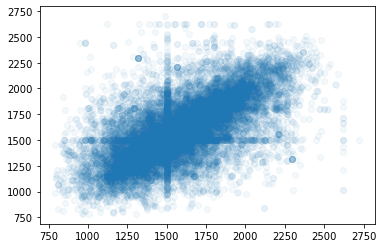

In [355]:
x = np.array(chess.black_rating)
y = np.array(chess.white_rating)

plt.scatter(x,y, alpha = 0.05)

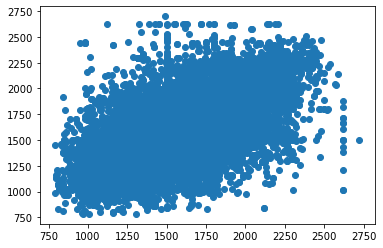

In [356]:
x = np.array(chess.black_rating)
y = np.array(chess.white_rating)

plt.scatter(x,y)

Calculating Pearson's correlation for White Rating vs Black Rating. 

In [360]:
corr, _ = pearsonr(chess.black_rating, chess.white_rating)
print("Pearson's Correlation: %.3f" % corr)

Pearson's Correlation: 0.634


In [363]:
corr, _ = spearmanr(chess.black_rating, chess.white_rating)
print("Spearman's Correlation: %.3f" % corr)

Spearman's Correlation: 0.654


Calculating covariance for White Rating vs. Black Rating

In [378]:
covariance = cov(chess.black_rating, chess.white_rating)
print(covariance)

[[84702.026614   53755.64707552]
 [53755.64707552 84828.52887821]]


#### Opening Shortname vs. Winner

C:\Users\eadam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Winner')

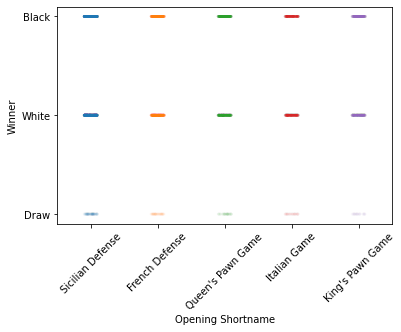

In [469]:
frames = [SD, FD, QPG, IG, KPG]
result = pd.concat(frames)

#result.head()
x = result["opening_shortname"]
y = result["winner"]

#plt.scatter(x,y)

OSN_W = sns.stripplot(x,y, alpha=0.025, jitter=True, size=3)
OSN_W.set_xticklabels(OSN_W.get_xticklabels(), rotation=45)
OSN_W.set_xlabel("Opening Shortname")
OSN_W.set_ylabel("Winner")

In [ ]:
testW = result["winner"].replace({"White":1, "Black": 2, "Draw": 0})
testOSN = result["opening_shortname"].replace({"Sicilian Defense":4, "French Defense":3, "Queen's Pawn Game":2, "Italian Game":1, "King's Pawn Game":0})


In [474]:
corr, _ = pearsonr(testW, testOSN)
print("Pearson's Correlation: %.3f" % corr)

Pearson's Correlation: 0.006


In [476]:
corr, _ = spearmanr(testW, testOSN)
print("Spearman's Correlation: %.3f" % corr)

Spearman's Correlation: 0.011


In [477]:
covariance = cov(testW, testOSN)
print(covariance)

[[0.34135746 0.00526297]
 [0.00526297 2.02276618]]


## Creating a Two-Tailed Test

Below, I performed a test to determine if there was statistical significance between the rating of White vs. Black. 

In [384]:
A = np.array(chess.white_rating)
B = np.array(chess.black_rating)

A.mean()
B.mean()

print('Mean of White Rating: %.3f ' % A.mean())
print('Mean of Black Rating: %.3f ' % B.mean())

Mean of White Rating: 1596.632 
Mean of Black Rating: 1588.832 


In [386]:
stats.ttest_ind(B,A)

Ttest_indResult(statistic=-2.6829202378923465, pvalue=0.00730123104085607)

In [390]:
from scipy.stats import ttest_ind  
    
def t_test(x,y,alternative='both-sided'):
    _, double_p = ttest_ind(x,y,equal_var = False)
    if alternative == 'both-sided':
        pval = double_p
    elif alternative == 'greater':
        if np.mean(x) > np.mean(y):
            pval = double_p/2.
        else:
            pval = 1.0 - double_p/2.
    elif alternative == 'less':
        if np.mean(x) < np.mean(y):
            pval = double_p/2.
        else:
            pval = 1.0 - double_p/2.
    return pval

In [391]:
t_test(A,B, alternative='greater')

0.00365061552126097

Next, I wanted to determine if there was statistical significance between the Winner variable and the Opening Shortname variable. As the t_test above was for numerical data, I changed the data to the object type 'int' to ensure the test ran. However, what I saw was that using t_test for the data resulted in a p-value of 1.0. This did not match with the information shown from the pmf data. 

In [447]:
testW = result["winner"].replace({"White":1, "Black": 2, "Draw": 0})
testOSN = result["opening_shortname"].replace({"Sicilian Defense":4, "French Defense":3, "Queen's Pawn Game":2, "Italian Game":1, "King's Pawn Game":0})

t_test(testW, testOSN, alternative="greater")

1.0

In [461]:

testOSN.mean()

2.5381184668989545

In [443]:
stats.ttest_ind(TtestW, TtestOSN)

Ttest_indResult(statistic=-60.9180720928332, pvalue=0.0)

What I then did was adjust the test to ensure that it related to two dependent variables, versus two independent variables. The adjustment was needed as the Winner variable is not independent. 

In [449]:
stats.ttest_rel(TtestW, TtestOSN)

Ttest_relResult(statistic=-61.0541412504241, pvalue=0.0)

## Creating a Multinomial Logistic Regression

In [459]:
import statsmodels.api as sm

logit_model=sm.MNLogit(testW, testOSN)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.905119
         Iterations 7
                        Results: MNLogit
Model:              MNLogit          Pseudo R-squared: -0.062    
Dependent Variable: winner           AIC:              12992.4508
Date:               2021-11-20 18:40 BIC:              13006.2075
No. Observations:   7175             Log-Likelihood:   -6494.2   
Df Model:           0                LL-Null:          -6115.2   
Df Residuals:       7173             LLR p-value:      nan       
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
     winner = 0      Coef.  Std.Err.    t    P>|t|  [0.025 0.975]
-----------------------------------------------------------------
opening_shortname    0.7464   0.0218 34.2612 0.0000 0.7037 0.7891
-----------------------------------------------------------------